# Validation funtions

Purpose of this notebook is to demonstrate and test validation functions

In [1]:
import rasterio as rio
import rasterio.plot
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, "..")
from eis_toolkit.validation.calculate_base_metrics import calculate_base_metrics
from eis_toolkit.validation.calculate_auc import calculate_auc
from eis_toolkit.validation.get_pa_intersection import get_pa_intersection
from eis_toolkit.validation.plot_rate_curve import plot_rate_curve
from eis_toolkit.validation.plot_prediction_area_curves import plot_prediction_area_curves

`small_raster.tif` acts as evidence layer which is evaluated. Two geodataframes are generated that represent deposit and negative point locations.

In [2]:
raster = rio.open("../tests/data/remote/small_raster.tif")
deposits = pd.DataFrame(
    {
        "x": [384824, 384803, 384807, 384793, 384773, 384785],
        "y": [6671284, 6671295, 6671277, 6671293, 6671343, 6671357],
    }
)
deposits = gpd.GeoDataFrame(deposits, geometry=gpd.points_from_xy(deposits.x, deposits.y, crs="EPSG:3067"))

negatives = pd.DataFrame(
    {
        "x": [384771, 384767, 384783, 384831, 384791, 384785, 384748],
        "y": [6671303, 6671380, 6671358, 6671283, 6671294, 6671275, 6671279],
    }
)
negatives = gpd.GeoDataFrame(negatives, geometry=gpd.points_from_xy(negatives.x, negatives.y, crs="EPSG:3067"))

Deposits (white) occur mostly on areas with higher values (yellow, green) while negatives (red) occur mostyly on areas with lower values (blue).

<AxesSubplot:>

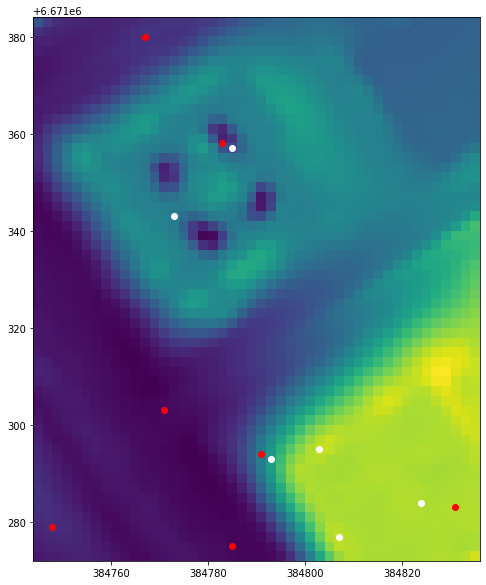

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(raster, ax=ax)
deposits.plot(ax=ax, facecolor='w', edgecolor='w')
negatives.plot(ax=ax, facecolor='r', edgecolor='r')

## Calculate base metrics

Metrics needed to construct different plots can be calculated with `calculate_base_metrics` function.
Data frame is returned which contains true positive rates, proportion of areas, thresholds used for calculations and false positive rates (only if negative points were given).

In [4]:
metrics = calculate_base_metrics(raster=raster, deposits=deposits, negatives=negatives)
metrics

,true_positive_rate_values,proportion_of_area_values,threshold_values,false_positive_rate_values
0,0.000000,0.000388,9.670,0.000000
1,0.166667,0.016693,9.060,0.000000
2,0.333333,0.019410,8.992,0.000000
3,0.500000,0.065217,8.795,0.142857
4,0.666667,0.198758,6.465,0.142857
5,0.833333,0.449922,5.469,0.285714
6,1.000000,0.657997,4.127,0.428571
7,1.000000,1.000000,2.503,1.000000


## Plot succes/prediction/ROC plots

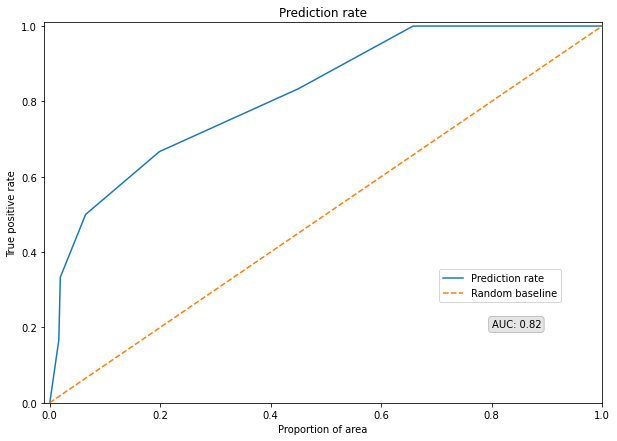

In [5]:
p = plot_rate_curve(metrics.proportion_of_area_values, metrics.true_positive_rate_values, "prediction_rate")

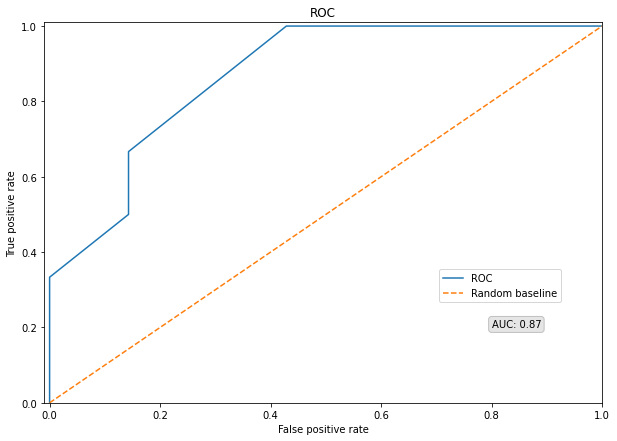

In [9]:
p = plot_rate_curve(metrics.false_positive_rate_values, metrics.true_positive_rate_values, "roc")

## Plot predicion-area plot

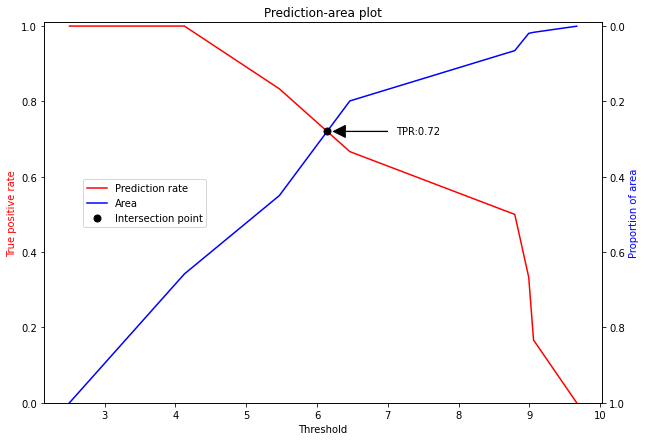

In [11]:
p = plot_prediction_area_curves(metrics.true_positive_rate_values, metrics.proportion_of_area_values, metrics.threshold_values)